<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sweden-Data" data-toc-modified-id="Sweden-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sweden Data</a></span></li><li><span><a href="#Load-data,-Fit-Model" data-toc-modified-id="Load-data,-Fit-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data, Fit Model</a></span></li><li><span><a href="#Display-Actual-vs-Prediction" data-toc-modified-id="Display-Actual-vs-Prediction-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Display Actual vs Prediction</a></span></li><li><span><a href="#Commentary" data-toc-modified-id="Commentary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Commentary</a></span></li></ul></div>

## Sweden Data
## Load data, Fit Model

In [1]:
import sys
from os import path
sys.path.append(path.pardir)
from src.covid import CovidCountry
import pandas as pd

# Load data
country = 'Sweden'
filepath = '../data/raw/'
fix_data = {}

se = CovidCountry(country=country,
                  filepath=filepath,
                  fixes=fix_data)

se.load(today=13216)

In [2]:
se.fit(curve='gamma')
se_df = se.predict()
se.save(filepath='../data/processed/')

In [3]:
# Show small window of prediction and actual
se_df[pd.Timestamp.now().date()-pd.Timedelta('3D'):].diff()[1:6]

,Actual,Prediction
Date,,
2020-04-15,482.0,469.919951
2020-04-16,613.0,461.243045
2020-04-17,676.0,451.502010
2020-04-18,NaN,440.808985
2020-04-19,NaN,429.276792


## Display Actual vs Prediction

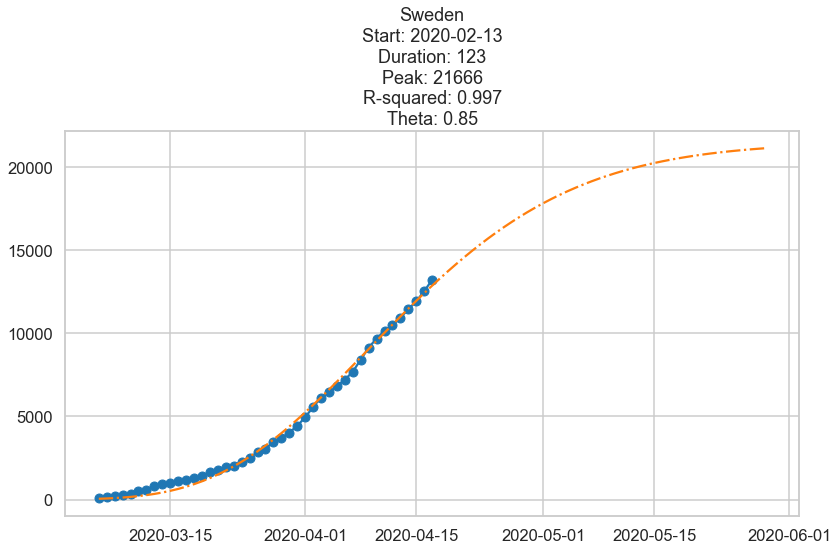

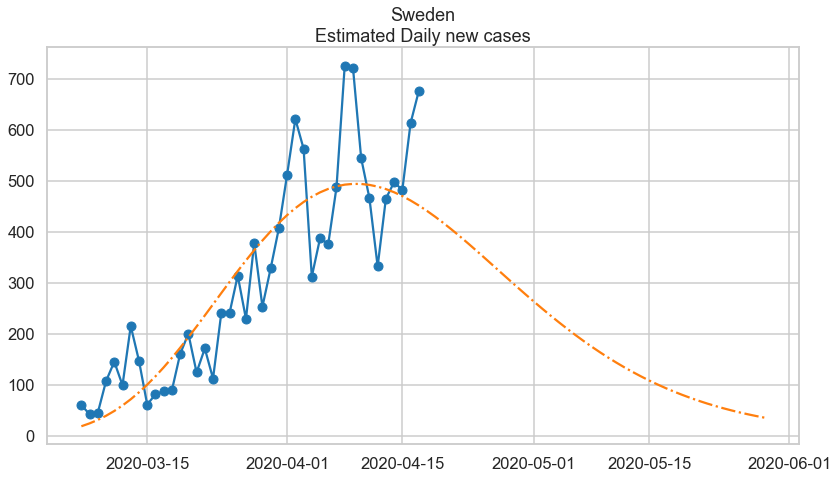

In [4]:
se.display(offset=42)

## Commentary
Sweden is interesting - it's made up of distinct S-curves. So fitting just one, isn't working well. Singapore was similar. It will be interesting to know why - Sweden are surpressing, not containing the outbreak. Which is very different to Singapore. Granted Sweden is much less dense - but people still live in relatively large cities.